# <b>ABOUT THE DATA</b>
<h2>The dataset consists of the daily weather summaries at various weather stations around the world during the World War 2 (WW2) between the years 1940 and 1945.
</h2>

<br>

# <b>Importing the necessary libraries</b>

In [1]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# <b>Importing and Inspecting the Data</b>

In [2]:
df = pd.read_csv('E:\Data Science_specialization_scripts\Summary of Weather.csv', parse_dates=["Date"])
stationLocation = pd.read_csv('E:\Data Science_specialization_scripts\Weather Station Locations.csv')

In [3]:
df.head()  # displays the first 5 rows of dataset 'df'

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-07-01,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-07-02,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-07-03,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-07-04,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-07-05,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stationLocation.head()  # displays the first 5 rows of dataset 'stationLocation'

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


### Understanding the shape and columns of the dataframe

In [5]:
df.shape  # tuple of the dimensions of the dataframe

(119040, 31)

In [6]:
list(df.columns)  # list of all columns in the dataframe.

['STA',
 'Date',
 'Precip',
 'WindGustSpd',
 'MaxTemp',
 'MinTemp',
 'MeanTemp',
 'Snowfall',
 'PoorWeather',
 'YR',
 'MO',
 'DA',
 'PRCP',
 'DR',
 'SPD',
 'MAX',
 'MIN',
 'MEA',
 'SNF',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

In [7]:
df.dtypes   # data types of all columns in the dataframe.

STA                     int64
Date           datetime64[ns]
Precip                 object
WindGustSpd           float64
MaxTemp               float64
MinTemp               float64
MeanTemp              float64
Snowfall               object
PoorWeather            object
YR                      int64
MO                      int64
DA                      int64
PRCP                   object
DR                    float64
SPD                   float64
MAX                   float64
MIN                   float64
MEA                   float64
SNF                    object
SND                   float64
FT                    float64
FB                    float64
FTI                   float64
ITH                   float64
PGT                   float64
TSHDSBRSGF             object
SD3                   float64
RHX                   float64
RHN                   float64
RVG                   float64
WTE                   float64
dtype: object

In [8]:
df.info(verbose=True) # printing the summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STA          119040 non-null  int64         
 1   Date         119040 non-null  datetime64[ns]
 2   Precip       119040 non-null  object        
 3   WindGustSpd  532 non-null     float64       
 4   MaxTemp      119040 non-null  float64       
 5   MinTemp      119040 non-null  float64       
 6   MeanTemp     119040 non-null  float64       
 7   Snowfall     117877 non-null  object        
 8   PoorWeather  34237 non-null   object        
 9   YR           119040 non-null  int64         
 10  MO           119040 non-null  int64         
 11  DA           119040 non-null  int64         
 12  PRCP         117108 non-null  object        
 13  DR           533 non-null     float64       
 14  SPD          532 non-null     float64       
 15  MAX          118566 non-null  floa

In [9]:
#Weather stations across the Globe
stationMap = folium.Map(width = 1920, height = 1080, zoom_start = 6)

for _, row in stationLocation.iterrows():
    folium.Marker(location = [row['Latitude'], row['Longitude']]).add_to(stationMap)
     
title_html = f'''
             <h1 align="center" style="font-size:30px"><b>{"Stations across the planet"}</b></h1>
             '''   

# Adding title to the map
stationMap.get_root().html.add_child(folium.Element(title_html))

stationMap


In [10]:
df.groupby("STA").mean()  # displays the mean of each column for each station

,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
STA,,,,,,,,,,,,,,,,,,,,,
10001,NaN,30.496975,22.520407,26.514933,43.576491,6.578220,15.758859,NaN,NaN,86.894555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,28.715983,23.565062,26.137255,44.172193,7.094118,15.859893,NaN,NaN,83.688770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10101,NaN,29.979889,22.375566,26.153008,43.924585,6.594268,15.790347,NaN,NaN,85.963801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10102,NaN,30.367892,22.199475,26.286527,43.725984,6.948819,15.828346,NaN,NaN,86.662205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10502,NaN,30.877901,21.409445,26.138034,43.309758,6.925344,15.768828,NaN,NaN,87.580223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82405,NaN,26.687042,16.312823,21.505026,44.002445,6.485330,15.853301,NaN,NaN,80.036675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82501,NaN,24.741935,11.430108,18.097969,43.513978,6.556989,15.881720,NaN,NaN,76.535484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82502,NaN,26.584119,12.229429,19.390723,43.870283,6.272406,15.786557,NaN,NaN,79.851415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Checking the missing values**

In [11]:
# Displays the count of each station
df.groupby("STA").count()

,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
STA,,,,,,,,,,,,,,,,,,,,,
10001,1157,1157,0,1157,1157,1157,1157,284,1157,1157,...,0,0,0,0,284,0,0,0,0,0
10002,935,935,0,935,935,935,935,182,935,935,...,0,0,0,0,182,0,0,0,0,0
10101,663,663,0,663,663,663,661,56,663,663,...,0,0,0,0,56,0,0,0,0,0
10102,1270,1270,0,1270,1270,1270,1270,641,1270,1270,...,0,0,0,0,641,0,0,0,0,0
10502,1527,1527,0,1527,1527,1527,1527,879,1527,1527,...,0,0,0,0,879,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82405,818,818,0,818,818,818,818,0,818,818,...,0,0,0,0,0,0,0,0,0,0
82501,465,465,0,465,465,465,465,0,465,465,...,0,0,0,0,0,0,0,0,0,0
82502,848,848,0,848,848,848,848,20,848,848,...,0,0,0,0,20,0,0,0,0,0


In [12]:
df[["STA", "MaxTemp", "MinTemp"]].describe()  # displays the summary of MaxTemp, MinTemp for each station

,STA,MaxTemp,MinTemp
count,119040.000000,119040.000000,119040.000000
mean,29659.435795,27.045111,17.789511
std,20953.209402,8.717817,8.334572
min,10001.000000,-33.333333,-38.333333
25%,11801.000000,25.555556,15.000000
50%,22508.000000,29.444444,21.111111
75%,33501.000000,31.666667,23.333333
max,82506.000000,50.000000,34.444444


In [13]:
df["MaxTemp"].isna().value_counts()  # displays the count of missing values for MaxTemp, MinTemp for each station
df["MinTemp"].isna().value_counts()

False    119040
Name: MinTemp, dtype: int64

In [14]:
df.describe()  # summary statistics of all columns in the dataframe.

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [15]:
df.isnull().sum()  # count of null values in each column

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [16]:
#Calculating the percentages of null values in each column
naPercentMiss = df.isnull().sum() * 100 / len(df)
missingDF = pd.DataFrame({'column_name': df.columns,'percent_missing': naPercentMiss})

In [17]:
naPercentMiss.sort_values(ascending=False) # printing the percentages of null values in each column in a sorted manner

WTE            100.000000
FT             100.000000
RVG            100.000000
FB             100.000000
RHN            100.000000
RHX            100.000000
SD3            100.000000
FTI            100.000000
ITH            100.000000
PGT             99.558972
SPD             99.553091
WindGustSpd     99.553091
DR              99.552251
SND             95.326781
TSHDSBRSGF      71.239079
PoorWeather     71.239079
PRCP             1.622984
Snowfall         0.976983
SNF              0.976983
MEA              0.418347
MAX              0.398185
MIN              0.393145
Date             0.000000
DA               0.000000
MO               0.000000
YR               0.000000
MeanTemp         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Precip           0.000000
STA              0.000000
dtype: float64

# **Selecting a Single Station**

In [18]:
stationLocation.head() #displays the first 5 rows of dataset 'stationLocation'

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [19]:
# Station locations in India
stationLocation[stationLocation["STATE/COUNTRY ID"] == "IN"]

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
66,32701,AGRA,IN,2710N,07802E,167,27.166667,78.100000
67,32801,BAMRAULI,IN,2526N,08150E,98,25.433333,81.833333
68,31701,BANGALORE,IN,1257N,07738E,897,12.950000,77.583333
69,32815,BARRACKPORE,IN,2246N,08822E,7,22.766667,88.366667
70,32907,BINDUKURI,IN,2643N,09248E,75,26.716667,92.716667
71,32803,CHAKULIA,IN,2227N,08642E,131,22.450000,86.716667
72,32805,GAYA,IN,2445N,08457E,115,24.750000,84.966667
73,32702,JODHPUR,IN,2616N,07303E,228,26.266667,73.133333
74,32904,JORHAT,IN,2643N,09410E,93,26.716667,94.166667
75,32812,KALAIKUNDA,IN,2220N,08713E,61,22.333333,87.233333


In [20]:
# Selecting the station in Bangalore.
blrStation = stationLocation[stationLocation["NAME"] == "BANGALORE"]
blrStation

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
68,31701,BANGALORE,IN,1257N,07738E,897,12.95,77.583333


In [21]:
#Pointing out Bangalore on the map
coords = [blrStation.Latitude, blrStation.Longitude]

station = folium.Map(
    location=coords, width=1920, height=1080, tiles="CartoDB positron", zoom_start=6
)
folium.Marker(location=coords).add_to(station)
station


title_html = f"""
             <h1 align="center" style="font-size:30px"><b>{"Weather Station at Bangalore"}</b></h1>
             """

station.get_root().html.add_child(folium.Element(title_html))
station


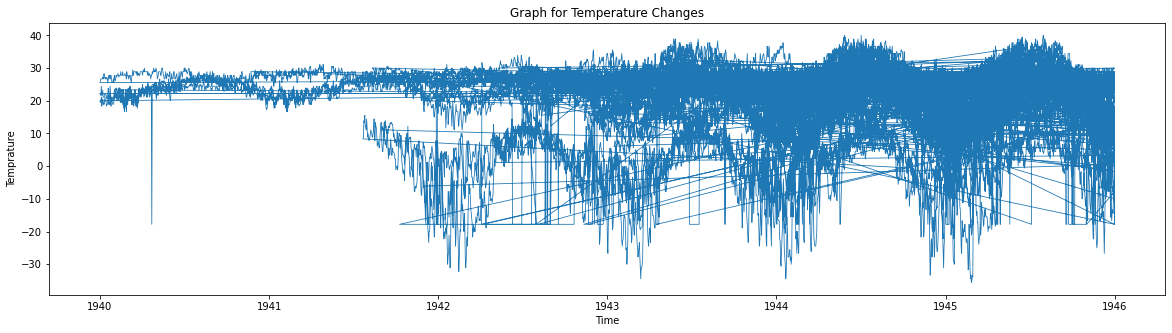

In [22]:
#Graph that shows the temperature changes over the years
plt.figure(figsize = (20,5))
plt.plot(df.Date, df.MeanTemp, linewidth = 0.8);

title = 'Graph for Temperature Changes'
x_label = 'Time'
y_label = 'Temprature'

plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

# Cleaning the dataset

In [23]:
# storing the unnecessary columns in a list
unnecessaryCols = [
    "MO",
    "YR",
    "DA",
    "Precip",
    "STA",
    "PoorWeather",
    "WindGustSpd",
    "TSHDSBRSGF",
    "Date",
    "PRCP",
    "DR",
    "Snowfall",
    "SPD",
    "SNF",
    "SND",
    "FT",
    "FB",
    "FTI",
    "ITH",
    "PGT",
    "SD3",
    "RHX",
    "RHN",
    "RVG",
    "WTE",
]

In [24]:
# dropping the unnecessary columns in df and storing new dataframe in newDf
newDf = df.drop(unnecessaryCols, axis=1)

In [25]:
# count of null values in newDf column-wise
newDf.isnull().sum()

MaxTemp       0
MinTemp       0
MeanTemp      0
MAX         474
MIN         468
MEA         498
dtype: int64

In [26]:
newDf.head(10)

,MaxTemp,MinTemp,MeanTemp,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,80.0,71.0,76.0
5,26.666667,21.666667,24.444444,80.0,71.0,76.0
6,28.333333,22.777778,25.555556,83.0,73.0,78.0
7,26.666667,22.222222,24.444444,80.0,72.0,76.0
8,27.222222,22.777778,25.000000,81.0,73.0,77.0
9,25.555556,21.666667,23.333333,78.0,71.0,74.0


In [27]:
newDf.dropna(axis=1)  # dropping columns having missing/null values and printing them

,MaxTemp,MinTemp,MeanTemp
0,25.555556,22.222222,23.888889
1,28.888889,21.666667,25.555556
2,26.111111,22.222222,24.444444
3,26.666667,22.222222,24.444444
4,26.666667,21.666667,24.444444
...,...,...,...
119035,28.333333,18.333333,23.333333
119036,29.444444,18.333333,23.888889
119037,28.333333,18.333333,23.333333
119038,28.333333,18.333333,23.333333


In [28]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   119040 non-null  float64
 1   MinTemp   119040 non-null  float64
 2   MeanTemp  119040 non-null  float64
 3   MAX       118566 non-null  float64
 4   MIN       118572 non-null  float64
 5   MEA       118542 non-null  float64
dtypes: float64(6)
memory usage: 5.4 MB


In [29]:
newDf.head() # No changes to the columns as there were no null attributes

,MaxTemp,MinTemp,MeanTemp,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,80.0,71.0,76.0


In [30]:
newDf.isnull().sum() #number of null values in column-wise in newDf

MaxTemp       0
MinTemp       0
MeanTemp      0
MAX         474
MIN         468
MEA         498
dtype: int64

In [31]:
# removing any null/missing values
newDf = newDf[~newDf["MAX"].isna()]
newDf = newDf[~newDf["MIN"].isna()]
newDf = newDf[~newDf["MEA"].isna()]

In [32]:
newDf.isnull().sum() #number of null values in column-wise in newDf

MaxTemp     0
MinTemp     0
MeanTemp    0
MAX         0
MIN         0
MEA         0
dtype: int64

In [33]:
newDf.info()  # printing summary of new dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118540 entries, 0 to 119039
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   118540 non-null  float64
 1   MinTemp   118540 non-null  float64
 2   MeanTemp  118540 non-null  float64
 3   MAX       118540 non-null  float64
 4   MIN       118540 non-null  float64
 5   MEA       118540 non-null  float64
dtypes: float64(6)
memory usage: 6.3 MB


# Data Visualization

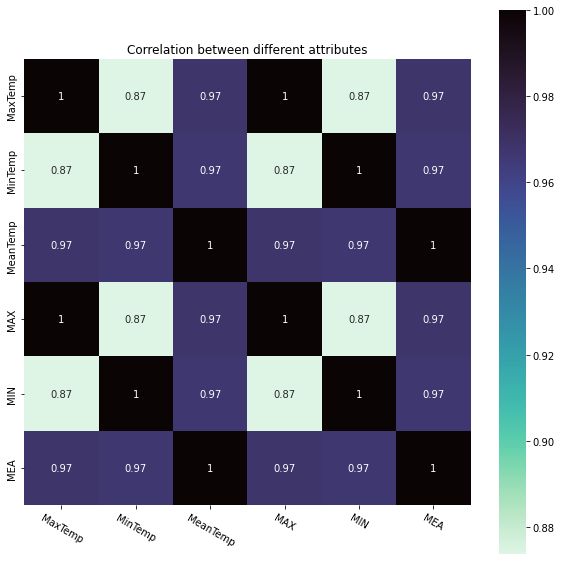

In [34]:
# Generating heatmap for understanding correlation between the temperatures
plt.figure(figsize=(10, 10))
sns.heatmap(newDf.corr(),vmax=1, annot=True,square=True,cmap='mako_r')
plt.title("Correlation between different attributes")
plt.xticks(rotation=-30)
plt.show()

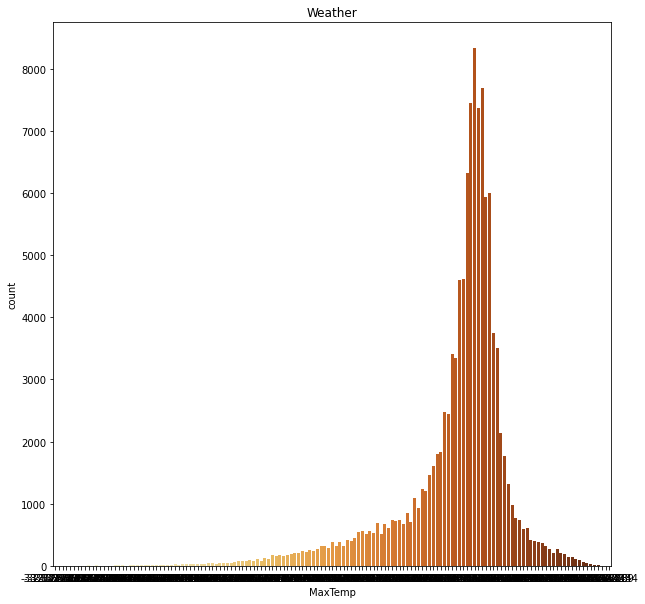

In [35]:
# Generating the countplot for Maxtemp
plt.figure(figsize=(10, 10))
sns.countplot(x="MaxTemp", data=newDf, palette="YlOrBr")
plt.title("Weather")
plt.show()

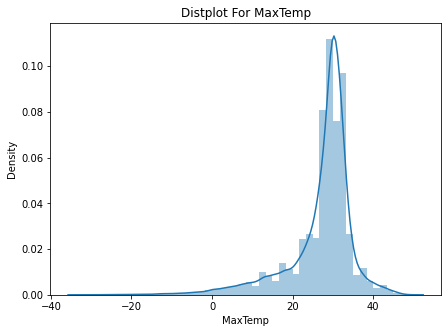

In [36]:
# Generating the distplot for MaxTemp (density wise distribution)
plt.figure(figsize=(7,5))
plt.title("Distplot For MaxTemp")
sns.distplot(newDf["MaxTemp"])
plt.show()

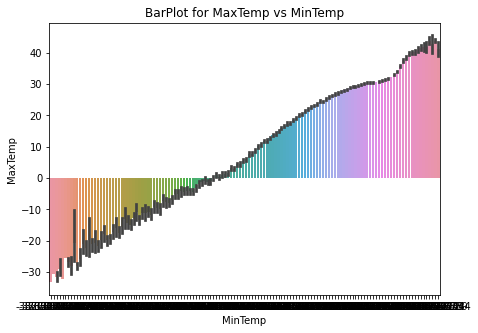

In [37]:
# Barplot for MaxTemp vs MinTemp
plt.figure(figsize=(7,5))
sns.barplot(x="MinTemp", y="MaxTemp", data=newDf)
plt.title("BarPlot for MaxTemp vs MinTemp")
plt.show()

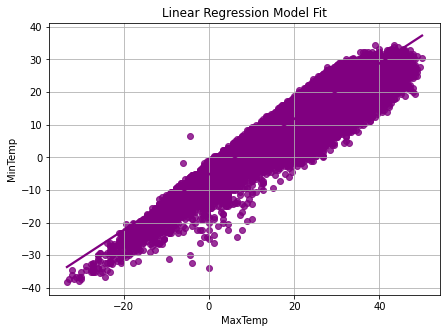

In [38]:
# Regplot generated to see the Linear regression model fit
plt.figure(figsize=(7,5))
sns.regplot(x="MaxTemp", y="MinTemp", data=newDf,color='purple')
plt.title("Linear Regression Model Fit")
plt.grid()
plt.show()

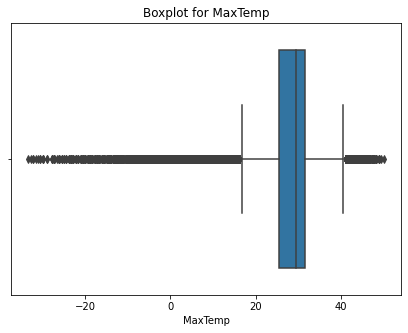

In [39]:
# BoxPlot for Max Temp
plt.figure(figsize=(7,5))
plt.title("Boxplot for MaxTemp")
sns.boxplot(x="MaxTemp", data=newDf)
plt.show()

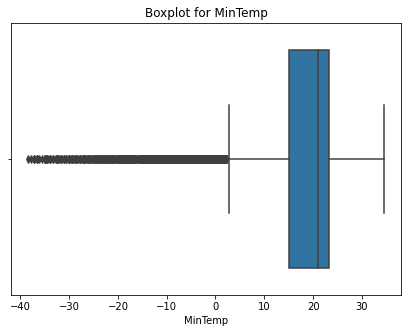

In [40]:
# Boxplot for Min Temp
plt.figure(figsize=(7,5))
plt.title("Boxplot for MinTemp")
sns.boxplot(x=newDf["MinTemp"])
plt.show()

# Splitting dataset for training and testing

In [41]:
X = newDf.drop(["MaxTemp"], axis=1)  # dataframe containing all values except Maxtemp
y = newDf["MaxTemp"]  # dataframe containing all MaxTemp values

In [42]:
X = np.array(newDf["MinTemp"]).reshape(-1, 1)  # dataframe containing all MinTemp values
y = np.array(y)

In [43]:
# Using the train_test_split function from sklearn to split the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

# Building a Linear Regression Model

In [44]:
# Performing Linear regression
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = LinearRegressor.predict(X_test)
print(y_pred)  # displaying the predictions of Max temperatures

[28.58516195 16.62071917 30.57923575 ... 14.62664537 30.0807173
 34.0688649 ]


## **Metrics**

In [46]:
from sklearn.metrics import mean_squared_error, r2_score


def all_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    report = f"""
    R2 Score: {r2_score(y_test,y_pred):.3f}
    MSE: {mse:.3f}
    RMSE: {np.sqrt(mse):.3f}
    """

    return report

In [47]:
# Score function used to display the prediction accuracy of Max temp
r2_score(y_test, y_pred)

0.7636890458605848

In [48]:
all_metrics(y_test,y_pred)

'\n    R2 Score: 0.764\n    MSE: 15.967\n    RMSE: 3.996\n    '

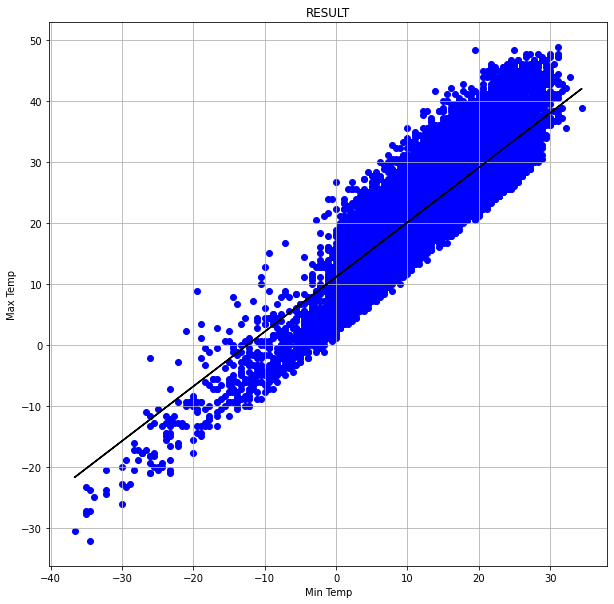

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(X_test, y_test, color="b")
plt.plot(X_test, y_pred, color="k")
plt.xlabel("Min Temp")
plt.ylabel("Max Temp")
plt.title("RESULT")
plt.grid()
plt.show()

## COMPARING REGRESSION MODELS

In [50]:
import os
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

### RIDGE REGRESSION

In [51]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_predict=model.predict(X_train)


error=0
for i in range(len(y_train)):
    error+=(abs(y_train[i]-y_predict[i]))
train_error_ridge=error/len(y_train)
train_error_ridge
print("Average Train error (Each reading) = "'{}'.format(train_error_ridge)+" in Ridge Regression")

y_Predict=model.predict(X_test)


error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-y_test[i]))
test_error_ridge=error/len(y_test)
print("Average Test error (Each reading) = "'{}'.format(test_error_ridge)+" in Ridge Regression")

R2_ridge = r2_score(y_test,y_Predict)
print ("R2 score of Ridge Regression = "+str(R2_ridge))

Average Train error (Each reading) = 3.1293583887776033 in Ridge Regression
Average Test error (Each reading) = 3.1119798542679393 in Ridge Regression
R2 score of Ridge Regression = 0.763689046202704


Text(0.5, 1.0, 'Residual plot in Ridge Regression')

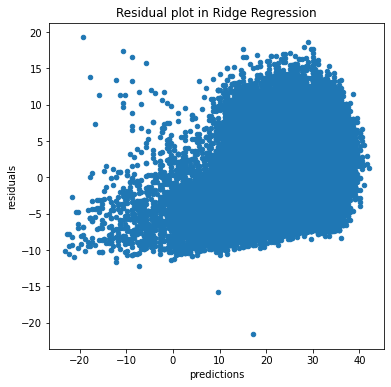

In [52]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

predictions = pd.DataFrame({"predictions":model.predict(X_train), "true":y_train})
predictions["residuals"] = predictions["true"] - predictions["predictions"]
predictions.plot(x = "predictions", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

### K NEIGHBOURS REGRESSOR 

In [53]:
knn=neighbors.KNeighborsRegressor(n_neighbors =2,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_train[i]))
train_error_knn=error/len(y_train)
print("Average Train error (Each reading) = "+'{}'.format(train_error_knn)+" in Knn algorithm")

y2_knn=knn.predict(X_test)
y2_knn=list(y2_knn)

error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-y_test[i]))
test_error_knn=error/len(y_test)
print("Average Test error (Each Reading) = "'{}'.format(test_error_knn)+" in knn algorithm")

R2_knn = r2_score(y_test,y2_knn)
print ("R2 score of K Neighbours Regression = "+str(R2_knn))

Average Train error (Each reading) = 3.415730508229608 in Knn algorithm
Average Test error (Each Reading) = 3.3949159214416547 in knn algorithm
R2 score of K Neighbours Regression = 0.7030949962985555


Text(0.5, 1.0, 'Residual plot in Knn')

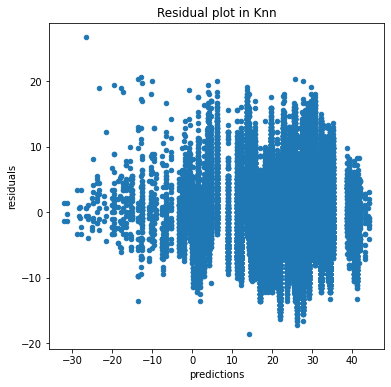

In [54]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
predictions = pd.DataFrame({"predictions":knn.predict(X_train), "true":y_train})
predictions["residuals"] = predictions["true"] - predictions["predictions"]
predictions.plot(x = "predictions", y = "residuals",kind = "scatter")
plt.title("Residual plot in Knn")

### BAYESIAN REGRESSION

In [55]:
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y1_reg=reg.predict(X_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(X_test)
y2_reg=list(y2_reg)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_train[i]))
train_error_bay=error/len(y_train)
print("Average Train error (Each reading) = "+'{}'.format(train_error_bay)+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-y_test[i]))
test_error_bay=(error/len(y_test))
print("Average Test error (Each reading) = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

R2_bay = r2_score(y_test,y2_reg)
print ("R2 score of Bayesian Regression = "+str(R2_bay))

Average Train error (Each reading) = 3.129356949746602 in Bayesian Regression
Average Test error (Each reading) = 3.1119783549980546 percent in Bayesian Regression
R2 score of Bayesian Regression = 0.7636890527335571


Text(0.5, 1.0, 'Residual plot in Bayesian Regression')

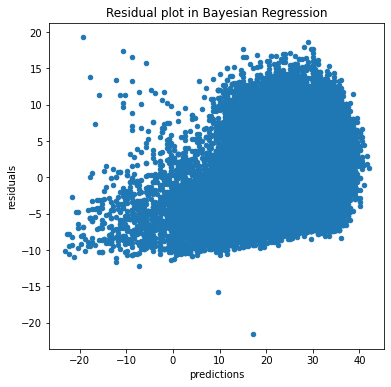

In [56]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
predictions = pd.DataFrame({"predictions":reg.predict(X_train), "true":y_train})
predictions["residuals"] = predictions["true"] - predictions["predictions"]
predictions.plot(x = "predictions", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

### Decision Tree Regressor

In [57]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
y1_dec=dec.predict(X_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(X_test)
y2_dec=list(y2_dec)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_train[i]))
train_error_tree=error/len(y_train)
print("Average Train error (Each reading) = "+'{}'.format(train_error_tree)+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-y_test[i]))
test_error_tree=error/len(y_test)
print("Average Test error (Each reading) = "'{}'.format(test_error_tree)+" in Decision Tree Regressor")

R2_dec = r2_score(y_test,y2_dec)
print ("R2 score of Decision Tree Regressor = "+str(R2_dec))

Average Train error (Each reading) = 3.7313379730308363 in Decision Tree Regressor
Average Test error (Each reading) = 6.745800482076615 in Decision Tree Regressor
R2 score of Decision Tree Regressor = 0.5667936810038526


Text(0.5, 1.0, 'Residual plot in Decision Tree')

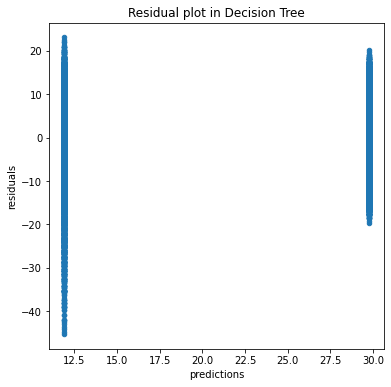

In [58]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
predictions = pd.DataFrame({"predictions":dec.predict(X_train), "true":y_train})
predictions["residuals"] = predictions["true"] - predictions["predictions"]
predictions.plot(x = "predictions", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

### SVM (Support Vector Machines) REGRESSOR

In [59]:
svm_reg=svm.SVR()
svm_reg.fit(X_train,y_train)
y1_svm=svm_reg.predict(X_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(X_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_train[i]))
train_error_svm=error/len(y_train)
print("Average Train error (Each reading) = "+'{}'.format(train_error_svm)+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-y_test[i]))
test_error_svm=error/len(y_test)
print("Average Test error (Each reading) = "'{}'.format(test_error_svm)+" in SVM Regressor")

R2_svm = r2_score(y_test,y2_svm)
print ("R2 score of SVM Regressor = "+str(R2_svm))

Average Train error (Each reading) = 2.7814959657424465 in SVM Regressor
Average Test error (Each reading) = 2.7618458029537734 in SVM Regressor
R2 score of SVM Regressor = 0.7934968601870697


Text(0.5, 1.0, 'Residual plot in SVM')

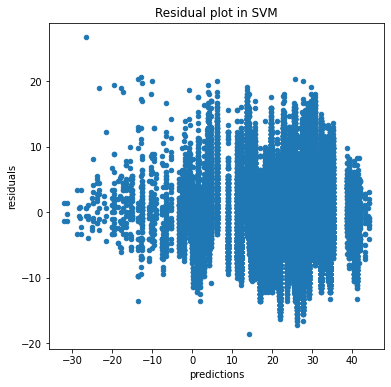

In [60]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
predictions = pd.DataFrame({"predictions":knn.predict(X_train), "true":y_train})
predictions["residuals"] = predictions["true"] - predictions["predictions"]
predictions.plot(x = "predictions", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

### SUMMARY

In [61]:
train_error=[train_error_ridge,train_error_knn,train_error_bay,train_error_tree,train_error_svm]
test_error=[test_error_ridge,test_error_knn,test_error_bay,test_error_tree,test_error_svm]
R2_score = [R2_ridge,R2_knn,R2_bay,R2_dec,R2_svm]

col={'Train Error':train_error,'Test Error':test_error,'R2 Score': R2_score}
models=['Ridge Regression','Knn Regressor','Bayesian Regression','Decision Tree','SVM Regressor']
df3=DataFrame(data=col,index=models)
df3

,Train Error,Test Error,R2 Score
Ridge Regression,3.129358,3.111980,0.763689
Knn Regressor,3.415731,3.394916,0.703095
Bayesian Regression,3.129357,3.111978,0.763689
Decision Tree,3.731338,6.745800,0.566794
SVM Regressor,2.781496,2.761846,0.793497


<AxesSubplot:>

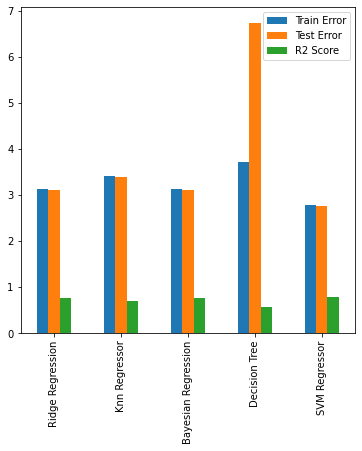

In [62]:
df3.plot(kind='bar')

### CONCLUSION : SVM Regressor Model yields the highest accuracy at around 80% among the other regression models.